In [39]:
import pickle
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from scipy.signal import find_peaks, find_peaks_cwt
modelling_hpc = '/Volumes/mo2016/home/Documents/modelling'
modelling_ephemeral = '/Volumes/mo2016/ephemeral/Documents/modelling'
modulepath = '/Users/mo2016/Documents/modelling/6eq/modules'
import sys
sys.path.append(modulepath)

while True:
    try:
        from numerical_solvers_variableboundary import *
        break
    except ImportError:
        modelling_hpc = '/rds/general/user/mo2016/home/Documents/modelling'
        modulepath = modelling_hpc + '/3954/modules'
        sys.path.append(modulepath)

from numerical_solvers_variableboundary import *
from numerical_solvers_variableboundary import *

circuit_n=4
variant=0
parametersets_n = 10000

# open parameter dictionaries
general_df = pickle.load(open(modelling_hpc + '/3954/parameter_space_search/results/output_dataframes/lsa_df_circuit2_variant%r_%rparametersets.pkl'%(variant,parametersets_n), "rb"))
general_df

ba    bb    bc    bd    be    bf          Va          Vb  \
1     0  0.01  0.01  0.01  0.01  0.01  0.01  346.393239   19.770732   
      1  0.01  0.01  0.01  0.01  0.01  0.01  346.393239   19.770732   
      2  0.01  0.01  0.01  0.01  0.01  0.01  346.393239   19.770732   
2     0  0.01  0.01  0.01  0.01  0.01  0.01   81.676624   58.969575   
      1  0.01  0.01  0.01  0.01  0.01  0.01   81.676624   58.969575   
...       ...   ...   ...   ...   ...   ...         ...         ...   
9996  0  0.01  0.01  0.01  0.01  0.01  0.01   17.209057   29.464220   
9997  0  0.01  0.01  0.01  0.01  0.01  0.01  234.605627   55.125924   
9998  0  0.01  0.01  0.01  0.01  0.01  0.01  143.439033   54.922349   
9999  0  0.01  0.01  0.01  0.01  0.01  0.01  536.376271  109.130153   
10000 0  0.01  0.01  0.01  0.01  0.01  0.01   17.453604   20.884779   

                 Vc          Vd  ...  oscillations  \
1     0   53.098595  280.177354  ...           1.0   
      1   53.098595  280.177354  ...           0.0   
      2   53.098595  280.177354  ...           NaN   
2     0  494.302517  119.481025  ...           NaN   
      1  494.302517  119.481025  ...           1.0   
...             ...         ...  ...           ...   
9996  0  647.430403   49.381620  ...           1.0   
9997  0   10.692000   11.721320  ...           1.0   
9998  0   27.061938   77.415862  ...           1.0   
9999  0  147.531305   27.846166  ...           0.0   
10000 0  265.925853   46.418034  ...           0.0   

                                                    k0_eig  turing_type  \
1     0  [(-1.588488886483666+0j), (-0.5373828209022375...          NaN   
      1  [-1.1837512777466623, -1.1836901809492537, -0....          NaN   
      2  [(-1.1837512823619+0j), (-1.0757272602039332-0...          NaN   
2     0  [(-0.1827376877497169-0.07451990977868735j), (...          NaN   
      1  [(-0.17160478655474762-0.04226366561944285j), ...          NaN   
...                                                    ...          ...   
9996  0  [(-0.00898363274894649+0j), (-0.00898188963216...          NaN   
9997  0  [(-0.30966051656011134-3.094232980100553e-09j)...          NaN   
9998  0  [(-1.4292880315297003+0j), (-0.188412312185913...          NaN   
9999  0  [-0.06738190538552774, -0.06618821060087002, -...          NaN   
10000 0  [-0.8378048974844199, -0.5015135253996398, -0....          NaN   

         ss_stability        ss_type      stripes  no_growth_1  no_growth_0  \
1     0        Stable   Stable point  non striped        False        False   
      1        Stable   Stable point  non striped        False        False   
      2      Unstable   Saddle point  non striped        False        False   
2     0      Unstable   Saddle point  non striped        False        False   
      1        Stable   Stable point  non striped        False        False   
...               ...            ...          ...          ...          ...   
9996  0        Stable  Stable spiral  non striped        False         True   
9997  0        Stable  Stable spiral  non striped        False        False   
9998  0        Stable   Stable point  non striped        False        False   
9999  0        Stable   Stable point  non striped        False        False   
10000 0        Stable   Stable point  non striped        False        False   

         growth_1  growth_0  
1     0     False     False  
      1     False     False  
      2     False     False  
2     0     False     False  
      1     False     False  
...           ...       ...  
9996  0     False     False  
9997  0     False     False  
9998  0     False     False  
9999  0     False     False  
10000 0     False     False  

[15521 rows x 38 columns]

In [40]:
def minmax_scaler(data, top = 255):
    scaled_data = (data - np.amin(data)) / (np.amax(data) - np.amin(data))
    return scaled_data*top

def plot_peaks(simulation,parID,print_stripped=True):
    print(parID)
#     red = simulation[-2]
#     red = np.concatenate([np.zeros(1), red, np.zeros(1)])

    green = simulation[-1]
    green = np.concatenate([np.zeros(1), green, np.zeros(1)])

#     minred,maxred = (np.min(red[np.nonzero(red)]),np.max(red[np.nonzero(red)]))
#     mingreen,maxgreen = (np.min(green[np.nonzero(green)]),np.max(green[np.nonzero(green)]))


#     print (minred,maxred,mingreen,maxgreen)
#     var_red,var_green = [(np.amax(red) - np.amin(red)), (np.amax(green) - np.amin(green))]
#     if var_red >0.5:
#         red = minmax_scaler(red)
        
#     if var_green > 0.5:
#         green = minmax_scaler(green)
        


    
    
#     if any(i>1 for i in [var_red,var_green]):
#         red *= 255.0 / red.max()
#         green *= 255.0 / green.max()
#         print(str(parID) + 'normalised' + str(var_red) + ',' + str(var_green))

#     else:
#         print(str(parID) + 'non_normalised' + str(var_red) + ',' + str(var_green))
    #findpeaks parametes


#     height = 1
#     threshold = 0
#     prominence = 0.1
    
    
    height = 1
    threshold = 0.1
    prominence = 0.1

    
#     red_peaks, properties = find_peaks(red, height = height,threshold = threshold,prominence = prominence*np.amax(red))
    green_peaks, properties = find_peaks(green, height= height, threshold = threshold,prominence = prominence*np.amax(green))


    
#     if print_stripped == True:
    if np.amax(len(green_peaks))>2:
        print('peaked')
#         ax1=plt.subplot(1, 2, 1)
#         ax1.plot(red[1:-1],c='r')
#         ax1.plot(red_peaks, red[red_peaks], "x")

        plt.plot(green[1:-1],c='g')
        plt.plot(green_peaks, green[green_peaks], "x")
            


        plt.show()
    
#     elif print_stripped == True:
    if np.amax(len(green_peaks))<=2:

        plt.plot(green[1:-1],c='g')
        plt.plot(green_peaks, green[green_peaks], "x")



        plt.show()

    return len(green_peaks)




In [41]:
def define_column(row,stripped_parID):
    parID = row.name[0]
    if parID in stripped_parID:
        return True
    else:
        return False
    

# Growth + Open boundary

In [42]:
boundary_coef=1
shape='growing_colony'
mechanism = 'lost_plasmid'
# parID=1
L,T,J,N = [8,100,64,12600]


In [43]:
nonstripped_parID = pickle.load( open( "%s_boundary%r_nonstripped_parID_%r.pkl"%(shape,boundary_coef,parametersets_n), "rb" ) ) 
stripped_parID  = pickle.load( open( "%s_boundary%r_stripped_parID_%r.pkl"%(shape,boundary_coef,parametersets_n), "rb" ) ) 


general_df['growth_1'] = general_df.apply (lambda row: define_column(row,stripped_parID), axis=1)
stripped_parID

[167,
 331,
 453,
 563,
 593,
 601,
 643,
 724,
 788,
 1131,
 1177,
 1231,
 1478,
 1705,
 2017,
 2156,
 2160,
 2223,
 2463,
 2607,
 2749,
 2817,
 2970,
 3138,
 3168,
 3183,
 3256,
 3296,
 3408,
 3551,
 3988,
 4055,
 4374,
 4732,
 4899,
 5007,
 5018,
 5745,
 5875,
 5980,
 6512,
 7238,
 8145,
 8241,
 8328,
 8465,
 8923,
 9092,
 9134,
 9453,
 9624,
 9888]

167
peaked


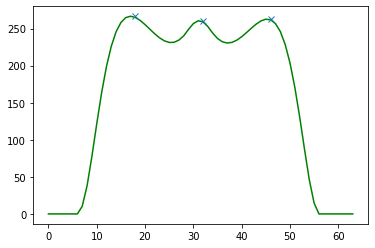

331
peaked


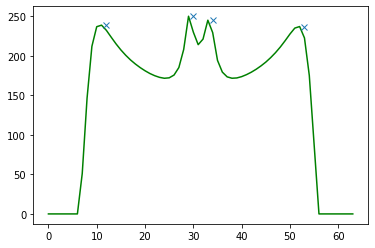

453
peaked


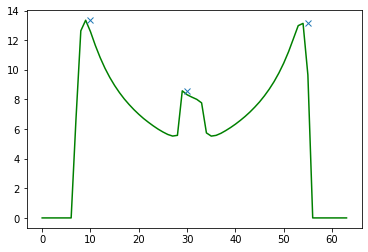

563
peaked


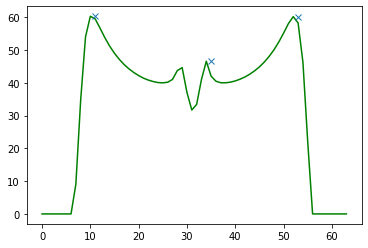

593
peaked


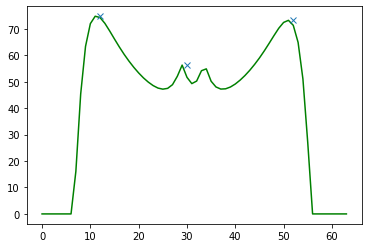

601
peaked


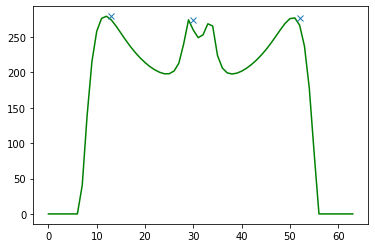

643
peaked


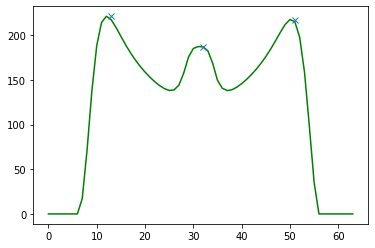

724
peaked


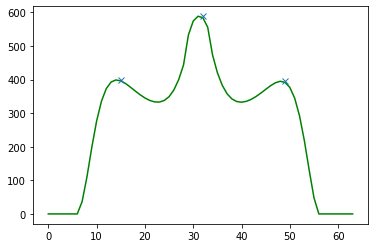

788
peaked


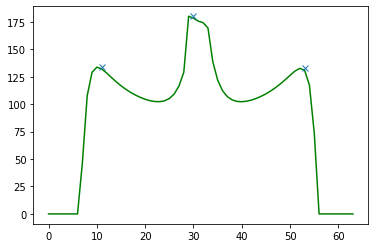

1131
peaked


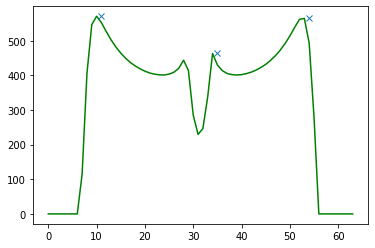

1177
peaked


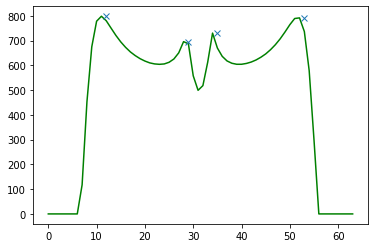

1231
peaked


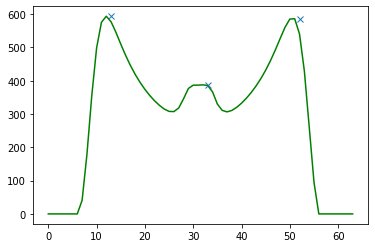

1478
peaked


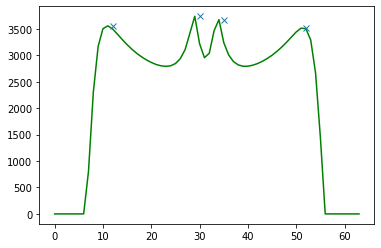

1705
peaked


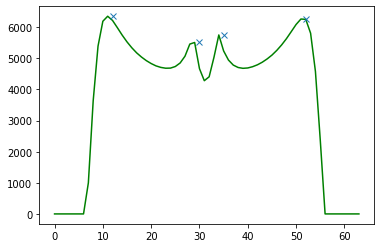

2017
peaked


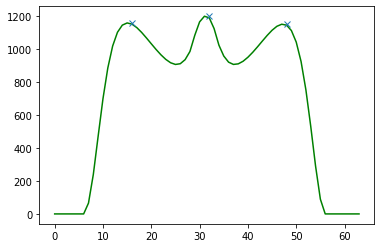

2156
peaked


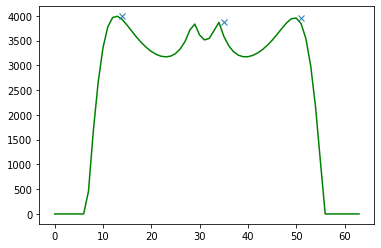

2160
peaked


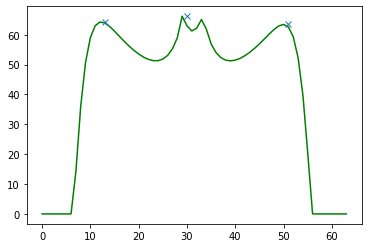

2223
peaked


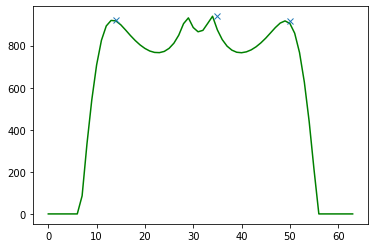

2463
peaked


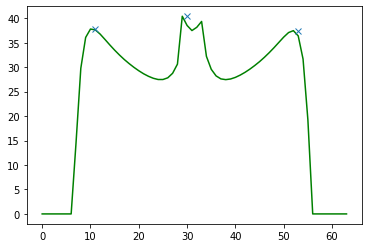

2607
peaked


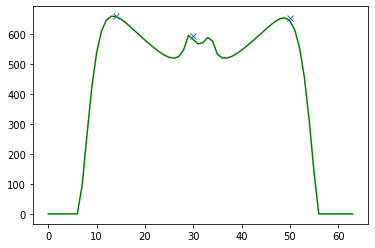

2749
peaked


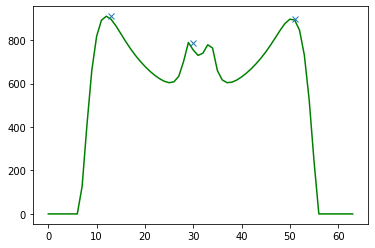

2817
peaked


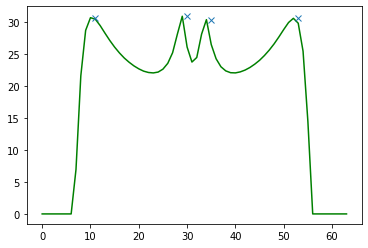

2970
peaked


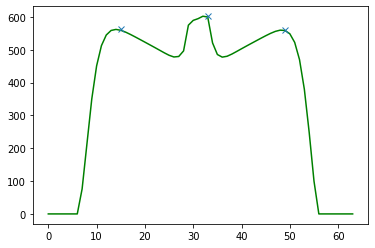

3138
peaked


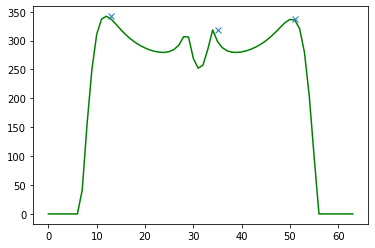

3168
peaked


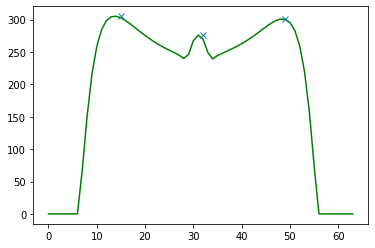

3183
peaked


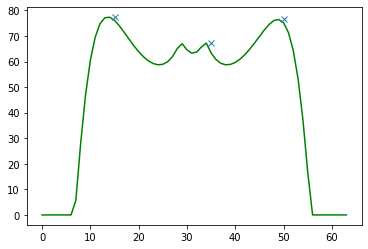

3256
peaked


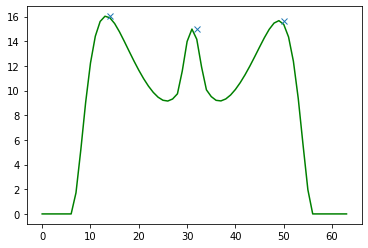

3296
peaked


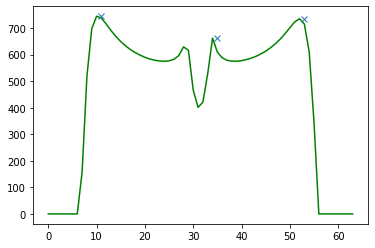

3408
peaked


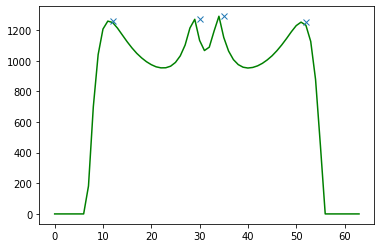

3551
peaked


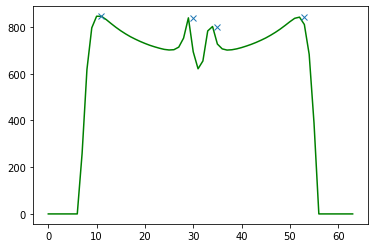

3988
peaked


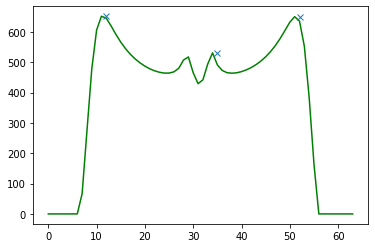

4055
peaked


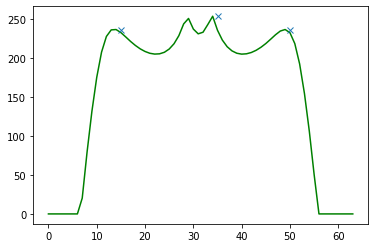

4374
peaked


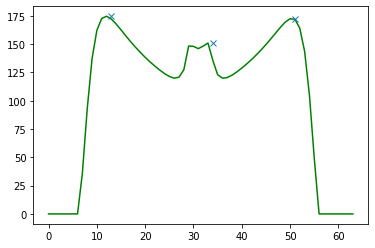

4732
peaked


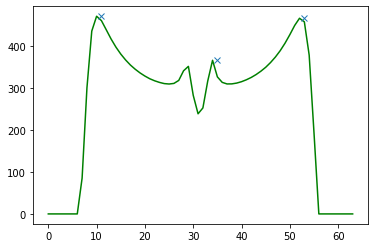

4899
peaked


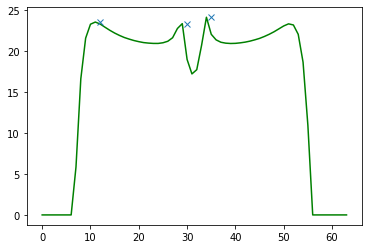

5007
peaked


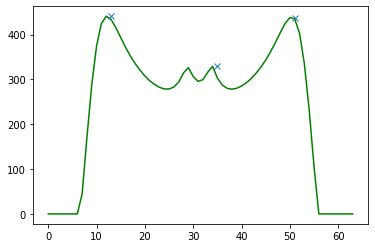

5018
peaked


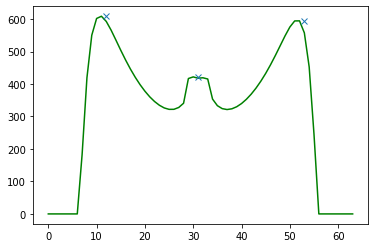

5745
peaked


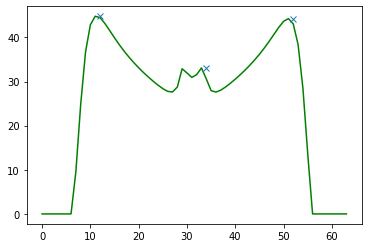

5875
peaked


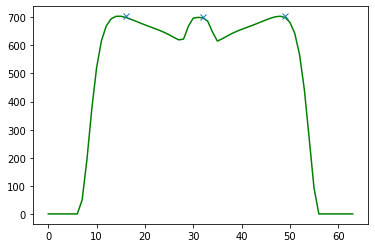

5980
peaked


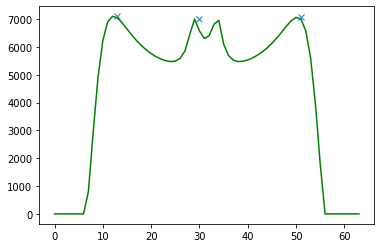

6512
peaked


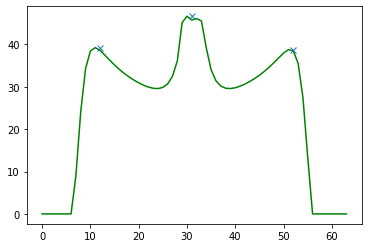

7238
peaked


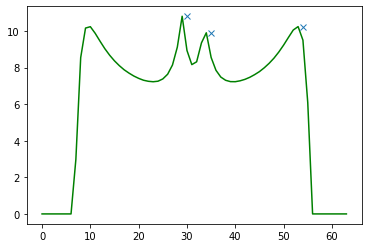

8145
peaked


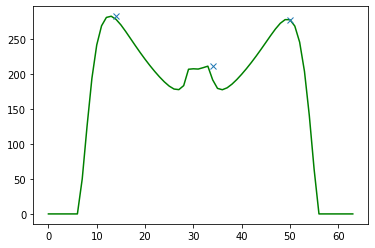

8241
peaked


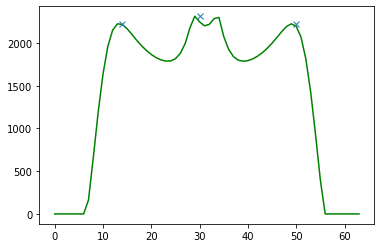

8328
peaked


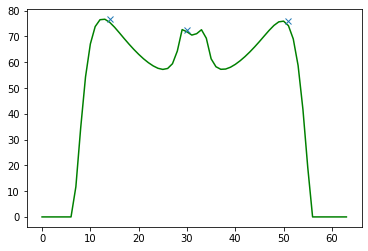

8465
peaked


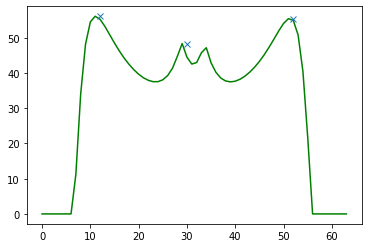

8923
peaked


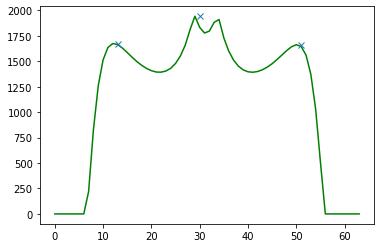

9092
peaked


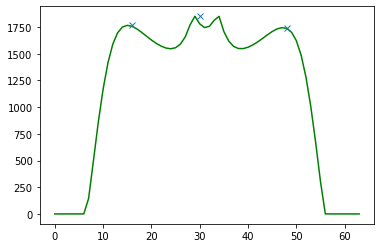

9134
peaked


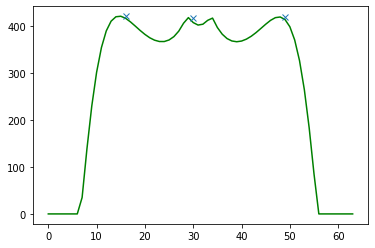

9453
peaked


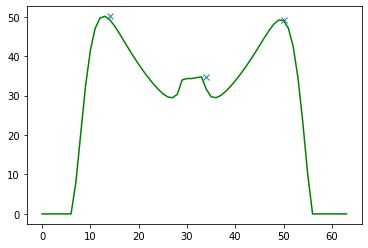

9624
peaked


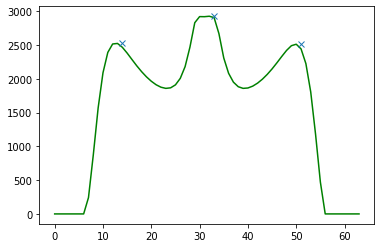

9888
peaked


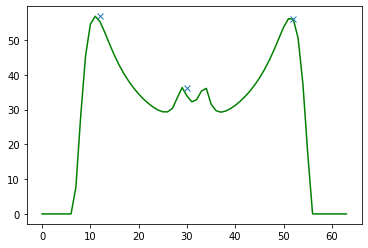

In [7]:
# stripped_parID = []
# nonstripped_parID = []
    
for parID in stripped_parID:
    filename = 'final_circuit%r_variant%r_boundary%r_%s_%sID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundary_coef, shape,mechanism,parID,L,J,T,N)
    simulation = pickle.load( open( modelling_ephemeral + '/3954/numerical_confocal/results/simulation/1M_df_%s/1D%s.pkl'%(mechanism,filename), "rb" ) ) 
    peaks_n = plot_peaks(simulation,parID,print_stripped=True)
#     if np.amax(peaks_n) > 2:
#         stripped_parID.append(parID)
#     else:
#         nonstripped_parID.append(parID)

In [18]:
pickle.dump( nonstripped_parID, open( "%s_boundary%r_nonstripped_parID_%r.pkl"%(shape,boundary_coef,parametersets_n), "wb" ) )
pickle.dump( stripped_parID, open( "%s_boundary%r_stripped_parID_%r.pkl"%(shape,boundary_coef,parametersets_n), "wb" ) )




# Growth + Closed boundary

In [44]:
boundary_coef=0
shape='growing_colony'
mechanism = 'lost_plasmid'
# parID=1
L,T,J,N = [8,100,64,12600]


In [45]:

nonstripped_parID = pickle.load( open( "%s_boundary%r_nonstripped_parID_%r.pkl"%(shape,boundary_coef,parametersets_n), "rb" ) ) 
stripped_parID  = pickle.load( open( "%s_boundary%r_stripped_parID_%r.pkl"%(shape,boundary_coef,parametersets_n), "rb" ) ) 


general_df['growth_0'] = general_df.apply (lambda row: define_column(row,stripped_parID), axis=1)



167
peaked


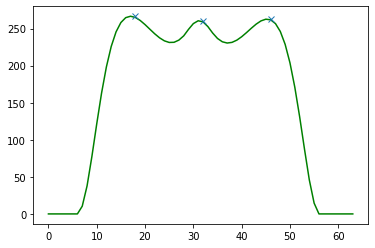

331
peaked


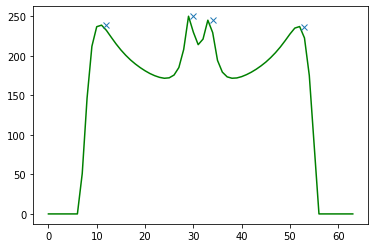

453
peaked


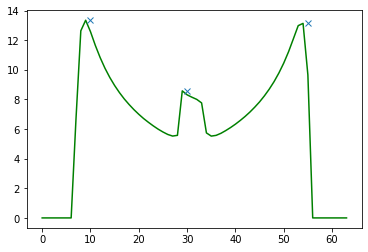

563
peaked


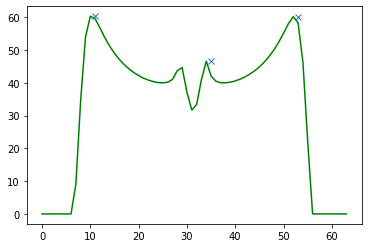

593
peaked


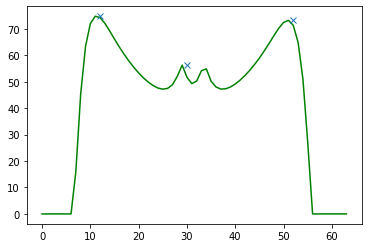

601
peaked


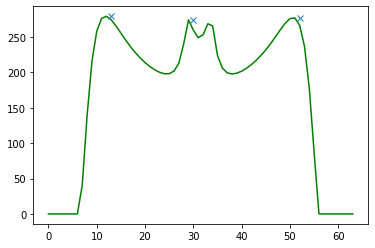

643
peaked


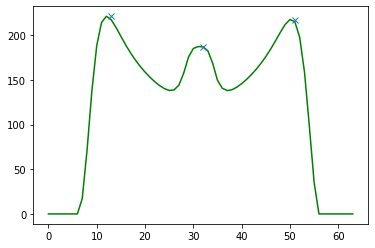

724
peaked


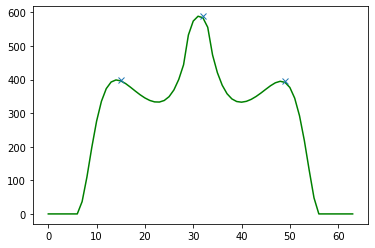

788
peaked


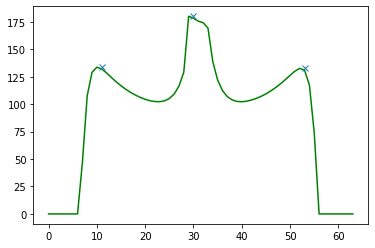

1131
peaked


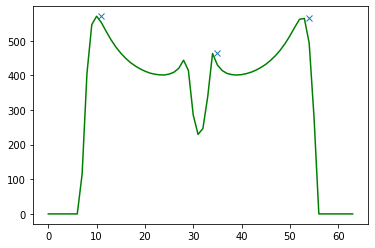

1177
peaked


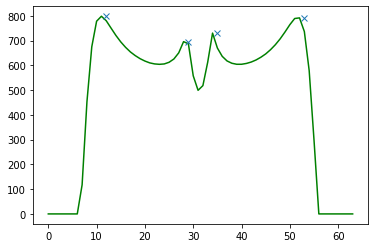

1231
peaked


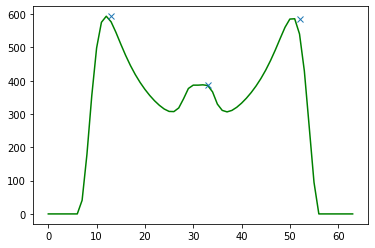

1478
peaked


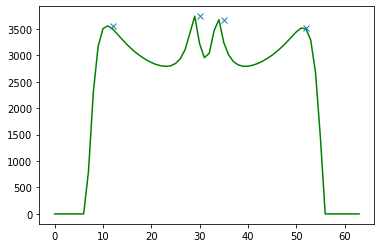

1705
peaked


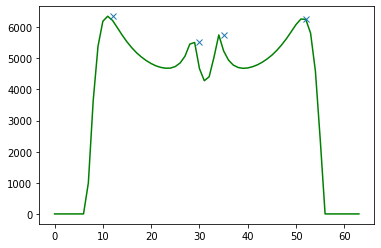

2017
peaked


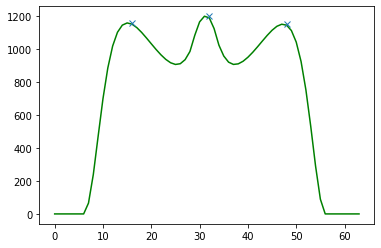

2156
peaked


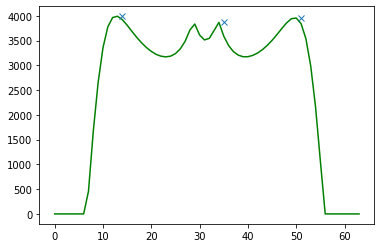

2160
peaked


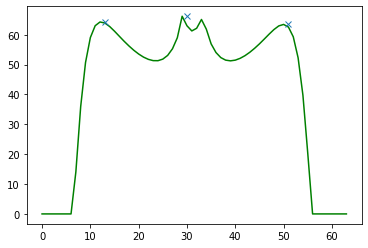

2223
peaked


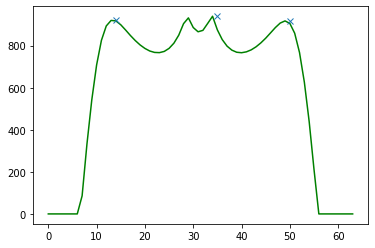

2463
peaked


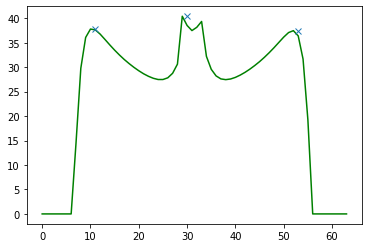

2607
peaked


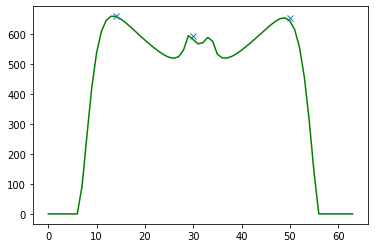

2749
peaked


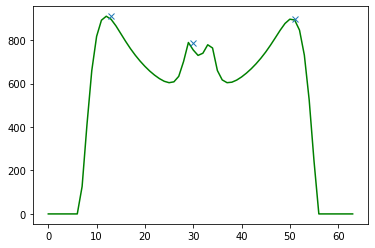

2817
peaked


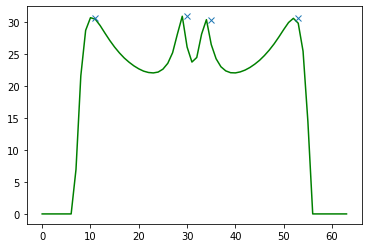

2970
peaked


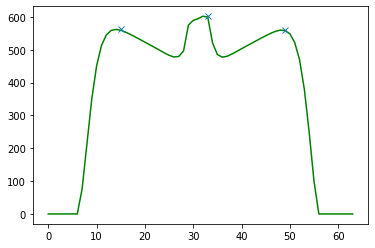

3138
peaked


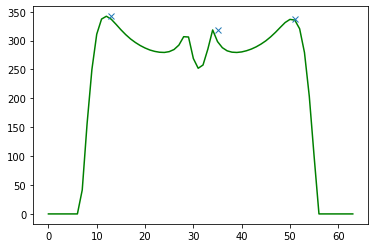

3168
peaked


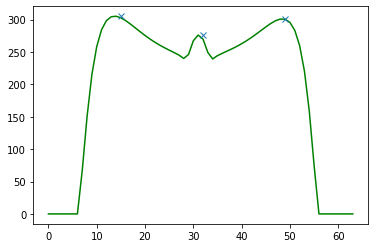

3183
peaked


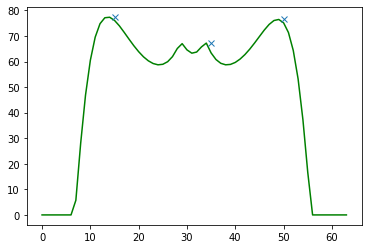

3256
peaked


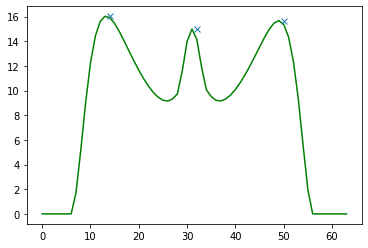

3296
peaked


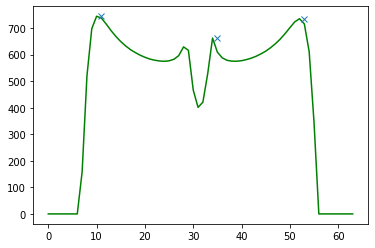

3408
peaked


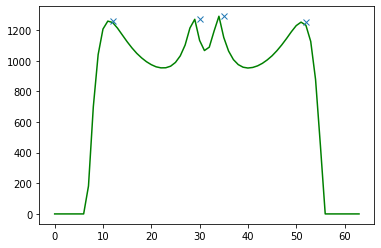

3551
peaked


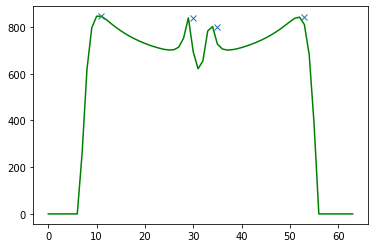

3988
peaked


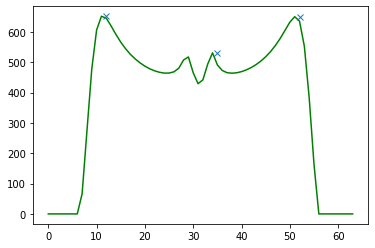

4055
peaked


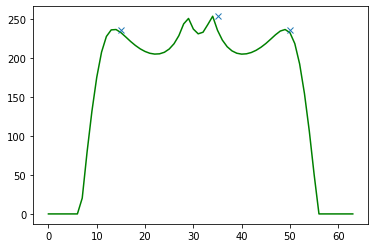

4374
peaked


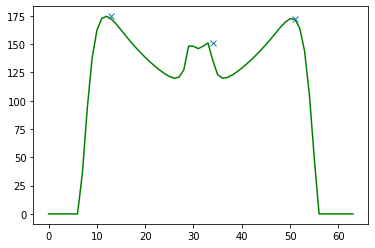

4732
peaked


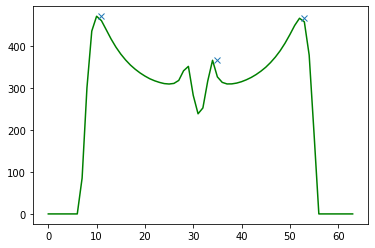

4899
peaked


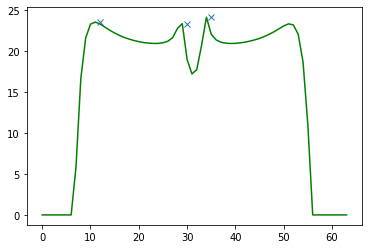

5007
peaked


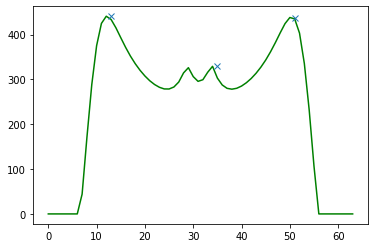

5018
peaked


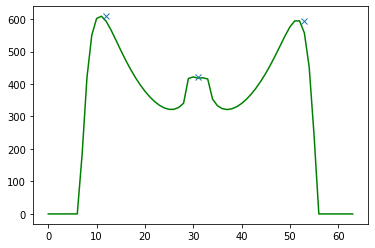

5745
peaked


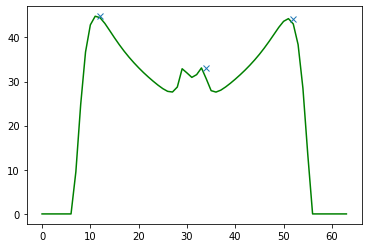

5875
peaked


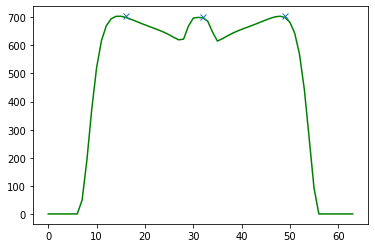

5980
peaked


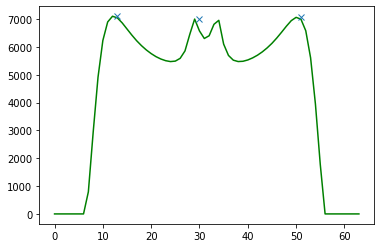

6512
peaked


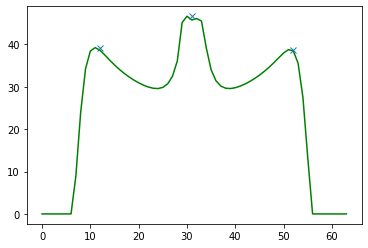

7238
peaked


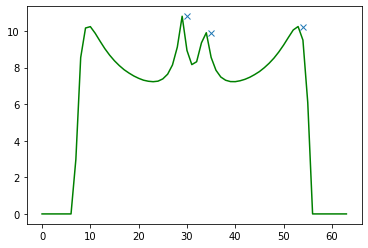

8145
peaked


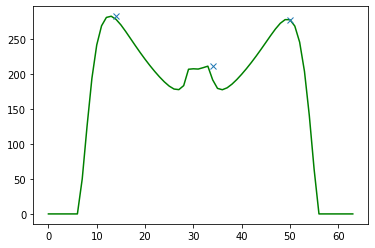

8241
peaked


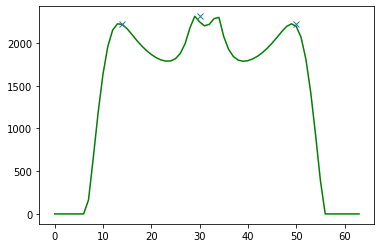

8328
peaked


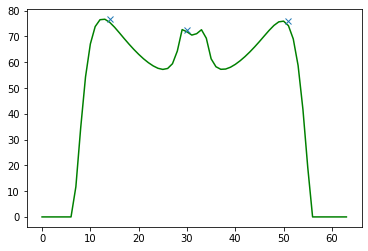

8465
peaked


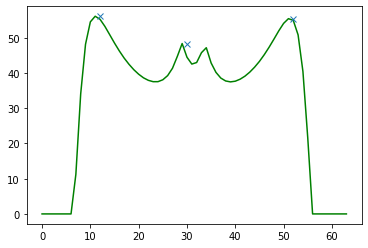

8923
peaked


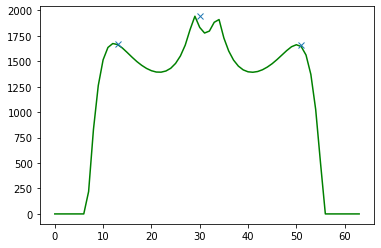

9092
peaked


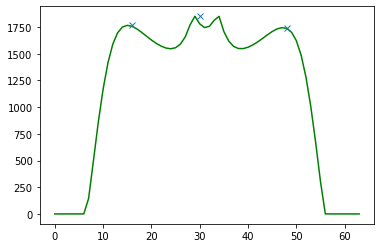

9134
peaked


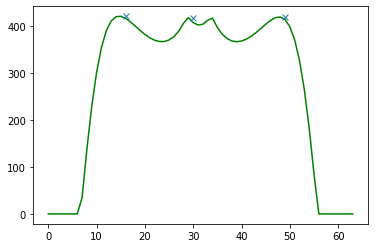

9453
peaked


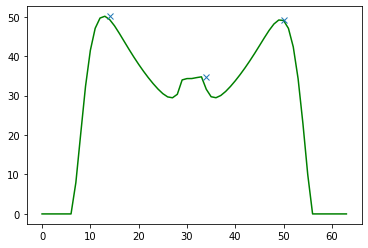

9624
peaked


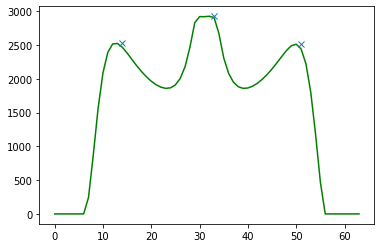

9888
peaked


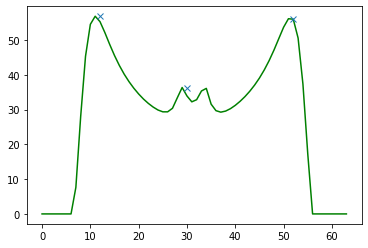

In [17]:
# stripped_parID = []
# nonstripped_parID = []
    
for parID in stripped_parID:
    filename = 'final_circuit%r_variant%r_boundary%r_%s_%sID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundary_coef, shape,mechanism,parID,L,J,T,N)
    simulation = pickle.load( open( modelling_ephemeral + '/3954/numerical_confocal/results/simulation/1M_df_%s/1D%s.pkl'%(mechanism,filename), "rb" ) ) 
    peaks_n = plot_peaks(simulation,parID,print_stripped=True)
#     if np.amax(peaks_n) > 2:
#         stripped_parID.append(parID)
#     else:
#         nonstripped_parID.append(parID)

In [20]:
pickle.dump( nonstripped_parID, open( "%s_boundary%r_nonstripped_parID_10000.pkl"%(shape,boundary_coef), "wb" ) )
pickle.dump( stripped_parID, open( "%s_boundary%r_stripped_parID_10000.pkl"%(shape,boundary_coef), "wb" ) )



# No growth + Open boundary

In [46]:
boundary_coef=1
shape='no_growth'
mechanism = 'lost_plasmid'
L,T,J,N = [8,100,64,12600]


In [47]:
nonstripped_parID = pickle.load( open( "%s_boundary%r_nonstripped_parID_%r.pkl"%(shape,boundary_coef,parametersets_n), "rb" ) ) 
stripped_parID  = pickle.load( open( "%s_boundary%r_stripped_parID_%r.pkl"%(shape,boundary_coef,parametersets_n), "rb" ) ) 


general_df['no_growth_1'] = general_df.apply (lambda row: define_column(row,stripped_parID), axis=1)


In [21]:
# stripped_parID = []
# nonstripped_parID = []
    
for parID in stripped_parID:
    filename = 'final_circuit%r_variant%r_boundary%r_%s_%sID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundary_coef, shape,mechanism,parID,L,J,T,N)
    simulation = pickle.load( open( modelling_ephemeral + '/3954/numerical_confocal/results/simulation/1M_df_%s/1D%s.pkl'%(mechanism,filename), "rb" ) ) 
    peaks_n = plot_peaks(simulation,parID,print_stripped=True)
#     if np.amax(peaks_n) > 2:
#         stripped_parID.append(parID)
#     else:
#         nonstripped_parID.append(parID)

In [23]:
pickle.dump( nonstripped_parID, open( "%s_boundary%r_nonstripped_parID_10000.pkl"%(shape,boundary_coef), "wb" ) )
pickle.dump( stripped_parID, open( "%s_boundary%r_stripped_parID_10000.pkl"%(shape,boundary_coef), "wb" ) )



# No growth + Closed boundary

In [48]:
boundary_coef=0
shape='no_growth'
mechanism = 'lost_plasmid'
L,T,J,N = [8,100,64,12600]



In [49]:
nonstripped_parID = pickle.load( open( "%s_boundary%r_nonstripped_parID_%r.pkl"%(shape,boundary_coef,parametersets_n), "rb" ) ) 
stripped_parID  = pickle.load( open( "%s_boundary%r_stripped_parID_%r.pkl"%(shape,boundary_coef,parametersets_n), "rb" ) ) 


general_df['no_growth_0'] = general_df.apply (lambda row: define_column(row,stripped_parID), axis=1)



In [25]:
# stripped_parID = []
# nonstripped_parID = []
    
for parID in stripped_parID:
    filename = 'final_circuit%r_variant%r_boundary%r_%s_%sID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundary_coef, shape,mechanism,parID,L,J,T,N)
    simulation = pickle.load( open( modelling_ephemeral + '/3954/numerical_confocal/results/simulation/1M_df_%s/1D%s.pkl'%(mechanism,filename), "rb" ) ) 
    peaks_n = plot_peaks(simulation,parID,print_stripped=True)
#     if np.amax(peaks_n) > 2:
#         stripped_parID.append(parID)
#     else:
#         nonstripped_parID.append(parID)

In [25]:
pickle.dump( nonstripped_parID, open( "%s_boundary%r_nonstripped_parID_10000.pkl"%(shape,boundary_coef), "wb" ) )
pickle.dump( stripped_parID, open( "%s_boundary%r_stripped_parID_10000.pkl"%(shape,boundary_coef), "wb" ) )



# Quantifying mechanisms


In [50]:
general_df.to_pickle(modelling_hpc + '/3954/parameter_space_search/results/output_dataframes/lsa_df_circuit%r_variant%r_%rparametersets.pkl'%(circuit_n,variant,parametersets_n))

In [53]:
general_df = pickle.load(open(modelling_hpc + '/3954/parameter_space_search/results/output_dataframes/lsa_df_circuit%r_variant%r_%rparametersets.pkl'%(circuit_n,variant,parametersets_n), "rb"))

general_df = general_df.xs(0,level=1)



In [54]:
general_df

,ba,bb,bc,bd,be,bf,Va,Vb,Vc,Vd,...,oscillations,k0_eig,turing_type,ss_stability,ss_type,stripes,no_growth_1,no_growth_0,growth_1,growth_0
1,0.01,0.01,0.01,0.01,0.01,0.01,346.393239,19.770732,53.098595,280.177354,...,1.0,"[(-1.588488886483666+0j), (-0.5373828209022375...",NaN,Stable,Stable point,non striped,False,False,False,False
2,0.01,0.01,0.01,0.01,0.01,0.01,81.676624,58.969575,494.302517,119.481025,...,NaN,"[(-0.1827376877497169-0.07451990977868735j), (...",NaN,Unstable,Saddle point,non striped,False,False,False,False
3,0.01,0.01,0.01,0.01,0.01,0.01,10.355239,952.874387,55.254409,22.496286,...,1.0,"[-5.097716201690709, -4.252029200198846, -0.05...",NaN,Stable,Stable point,non striped,False,False,False,False
4,0.01,0.01,0.01,0.01,0.01,0.01,283.284460,25.842650,27.056754,14.812807,...,1.0,"[(-0.0247742627549326+0j), (-0.023344767431917...",NaN,Stable,Stable spiral,non striped,False,False,False,False
5,0.01,0.01,0.01,0.01,0.01,0.01,23.141913,122.811899,23.437384,911.460740,...,1.0,"[(-63.38049263516152+0j), (-13.039988293732883...",NaN,Stable,Stable spiral,non striped,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.01,0.01,0.01,0.01,0.01,0.01,17.209057,29.464220,647.430403,49.381620,...,1.0,"[(-0.00898363274894649+0j), (-0.00898188963216...",NaN,Stable,Stable spiral,non striped,False,False,False,False
9997,0.01,0.01,0.01,0.01,0.01,0.01,234.605627,55.125924,10.692000,11.721320,...,1.0,[(-0.30966051656011134-3.094232980100553e-09j)...,NaN,Stable,Stable spiral,non striped,False,False,False,False
9998,0.01,0.01,0.01,0.01,0.01,0.01,143.439033,54.922349,27.061938,77.415862,...,1.0,"[(-1.4292880315297003+0j), (-0.188412312185913...",NaN,Stable,Stable point,non striped,False,False,False,False
9999,0.01,0.01,0.01,0.01,0.01,0.01,536.376271,109.130153,147.531305,27.846166,...,0.0,"[-0.06738190538552774, -0.06618821060087002, -...",NaN,Stable,Stable point,non striped,False,False,False,False


In [37]:
# stripped_parID = []
# nonstripped_parID = []
    
for parID in stripped_parID:
    filename = 'final_circuit%r_variant%r_boundary%r_%s_%sID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundary_coef, shape,mechanism,parID,L,J,T,N)
    simulation = pickle.load( open( modelling_ephemeral + '/3954/numerical_confocal/results/simulation/1M_df_%s/1D%s.pkl'%(mechanism,filename), "rb" ) ) 
    peaks_n = plot_peaks(simulation,parID,print_stripped=True)
#     if np.amax(peaks_n) > 2:
#         stripped_parID.append(parID)
#     else:
#         nonstripped_parID.append(parID)

## Noise amplifier

In [55]:
noise_amplifier = general_df[general_df["no_growth_0"]==True]
noise_amplifier


,ba,bb,bc,bd,be,bf,Va,Vb,Vc,Vd,...,oscillations,k0_eig,turing_type,ss_stability,ss_type,stripes,no_growth_1,no_growth_0,growth_1,growth_0


## Boundary induced patterns

In [56]:
non_noise_amplifier = general_df[general_df["no_growth_0"]==False]
boundary_pattern = non_noise_amplifier[non_noise_amplifier['no_growth_1']==True]
boundary_pattern

,ba,bb,bc,bd,be,bf,Va,Vb,Vc,Vd,...,oscillations,k0_eig,turing_type,ss_stability,ss_type,stripes,no_growth_1,no_growth_0,growth_1,growth_0


## Growth induced patterns

In [57]:
non_noise_amplifier = general_df[general_df["no_growth_0"]==False]
non_boundary_pattern = non_noise_amplifier[non_noise_amplifier['no_growth_1']==False]
growth_pattern = non_boundary_pattern[non_boundary_pattern['growth_1']==True]
growth_pattern

,ba,bb,bc,bd,be,bf,Va,Vb,Vc,Vd,...,oscillations,k0_eig,turing_type,ss_stability,ss_type,stripes,no_growth_1,no_growth_0,growth_1,growth_0
167,0.01,0.01,0.01,0.01,0.01,0.01,196.926844,235.830005,141.853097,139.765262,...,1.0,"[(-3.1158352754521355+0j), (-2.739018135386684...",NaN,Stable,Stable spiral,striped,False,False,True,True
331,0.01,0.01,0.01,0.01,0.01,0.01,70.536289,187.180480,344.185740,312.706028,...,1.0,"[(-7.308539404526181+0j), (-7.277132828204361+...",NaN,Stable,Stable spiral,striped,False,False,True,True
453,0.01,0.01,0.01,0.01,0.01,0.01,465.705781,146.782826,77.298991,237.593375,...,1.0,"[-18.112915102264022, -18.050638733410604, -0....",NaN,Stable,Stable point,striped,False,False,True,True
563,0.01,0.01,0.01,0.01,0.01,0.01,669.425052,458.440989,635.547012,62.482887,...,1.0,"[(-20.881888297438465+0j), (-20.14613968646861...",NaN,Stable,Stable spiral,striped,False,False,True,True
593,0.01,0.01,0.01,0.01,0.01,0.01,164.479026,503.846381,230.973383,10.053497,...,1.0,"[(-2.958471425284998+0j), (-2.9580944485391676...",NaN,Stable,Stable spiral,striped,False,False,True,True
601,0.01,0.01,0.01,0.01,0.01,0.01,26.706062,390.955912,205.229772,322.259637,...,1.0,"[(-21.326875764727635+0j), (-21.28034232008006...",NaN,Stable,Stable spiral,striped,False,False,True,True
643,0.01,0.01,0.01,0.01,0.01,0.01,318.116095,117.059597,33.095573,509.228503,...,1.0,"[(-10.893967860617053+0j), (-10.89396498806228...",NaN,Stable,Stable spiral,non striped,False,False,True,True
724,0.01,0.01,0.01,0.01,0.01,0.01,80.524307,291.768545,48.515346,40.268249,...,1.0,"[(-1.366092140166793+0j), (-1.3659241419460266...",NaN,Stable,Stable spiral,striped,False,False,True,True
788,0.01,0.01,0.01,0.01,0.01,0.01,693.123627,38.290491,41.752902,238.974700,...,1.0,"[(-3.340351599444955+0j), (-3.3403402035648515...",NaN,Stable,Stable spiral,striped,False,False,True,True
1131,0.01,0.01,0.01,0.01,0.01,0.01,17.543894,234.829195,77.485155,260.293693,...,1.0,"[(-10.711962981352327+0j), (-10.20186957582478...",Turing Oscillatory,Stable,Stable spiral,striped,False,False,True,True


In [59]:
len_turing_pattern = 0
print(len_turing_pattern ,len(noise_amplifier),len(boundary_pattern),len(growth_pattern))



0 0 0 52


## Summary stats

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import *
import matplotlib as mpl
mpl.rcParams['font.size'] = 15

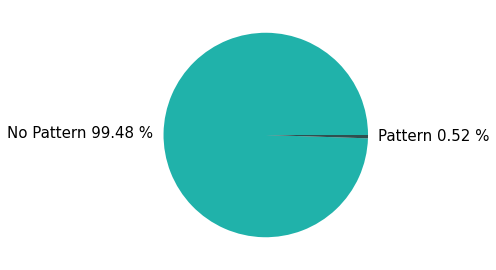

In [62]:
total = 10000

pattern = len_turing_pattern + len(noise_amplifier)+len(boundary_pattern)+len(growth_pattern)
no_pattern = int(total-pattern)
y = np.array([no_pattern,pattern])
mylabels = ["No Pattern %.2f %%"%(no_pattern/total*100), 'Pattern %.2f %%'%(pattern/total*100)]
mycolors = ['lightseagreen','darkslategrey']
plt.pie(y, labels = mylabels,colors = mycolors)
plt.tight_layout()
plt.savefig('10000_fullcircuit_piechart_patterns.png',bbox_inches='tight')
plt.show()



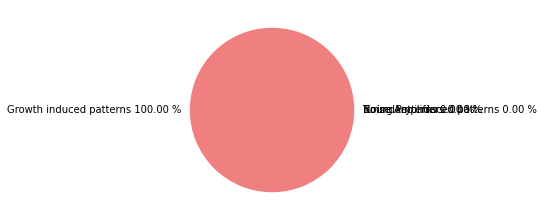

In [65]:
mpl.rcParams['font.size'] = 10
y = np.array([len_turing_pattern,len(noise_amplifier),len(boundary_pattern),len(growth_pattern)])
percentages = (y/pattern)*100
mylabels = ['Turing Patterns %.2f %%'%percentages[0], 'Noise Amplifiers %.2f %%'%percentages[1], 'Boundary induced patterns %.2f %%'%percentages[2],'Growth induced patterns %.2f %%'%percentages[3]]
mycolors = ['tomato','bisque','lightsalmon','lightcoral']
plt.pie(y, labels = mylabels,colors = mycolors)
plt.tight_layout()
plt.savefig('10000_fullcircuit_piechart_mechanisms.png',bbox_inches='tight')
plt.show()
